<a href="https://colab.research.google.com/github/SushanthKumble/DATASCIENCE/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
#Write a program to implement K- Nearest Neighbors’ classifier to find accuracy for training and test fruit data set.
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [85]:
#importing datasets
data_set= pd.read_csv('/content/drive/MyDrive/DATA SCIENCE LAB/addednan.csv')
df=pd.DataFrame(data_set)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,NaN,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [86]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [87]:
data_set["Gender"].fillna("No Gender", inplace = True)

In [88]:
data_set.fillna(method="bfill")

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,No Gender,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [89]:
print(data_set.isnull().sum())

User ID            0
Gender             0
Age                1
EstimatedSalary    1
Purchased          0
dtype: int64


In [90]:
data_set.dropna(inplace=True)

In [91]:
print(data_set.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [92]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [93]:
x_test

array([[2.30e+01, 8.20e+04],
       [2.80e+01, 5.50e+04],
       [1.80e+01, 5.20e+04],
       [3.00e+01, 8.00e+04],
       [2.70e+01, 3.10e+04],
       [2.30e+01, 4.80e+04],
       [4.20e+01, 7.30e+04],
       [2.30e+01, 6.60e+04],
       [3.20e+01, 1.80e+04],
       [4.70e+01, 5.10e+04],
       [4.20e+01, 6.50e+04],
       [3.90e+01, 7.90e+04],
       [3.20e+01, 8.60e+04],
       [2.50e+01, 8.70e+04],
       [3.70e+01, 5.30e+04],
       [4.30e+01, 1.12e+05],
       [4.90e+01, 3.60e+04],
       [3.70e+01, 8.00e+04],
       [3.00e+01, 1.07e+05],
       [5.10e+01, 1.34e+05],
       [4.90e+01, 8.60e+04],
       [2.60e+01, 1.18e+05],
       [2.30e+01, 2.80e+04],
       [2.80e+01, 8.70e+04],
       [4.00e+01, 6.00e+04],
       [4.20e+01, 7.90e+04],
       [5.70e+01, 1.22e+05],
       [6.00e+01, 8.30e+04],
       [4.70e+01, 1.05e+05],
       [2.00e+01, 8.20e+04],
       [5.50e+01, 1.25e+05],
       [4.10e+01, 5.20e+04],
       [4.60e+01, 5.90e+04],
       [3.70e+01, 1.44e+05],
       [5.90e+

In [71]:
x_train

array([[4.10e+01, 7.20e+04],
       [4.10e+01, 5.20e+04],
       [4.80e+01, 1.41e+05],
       [3.50e+01, 8.80e+04],
       [3.80e+01, 6.10e+04],
       [3.90e+01, 5.90e+04],
       [3.90e+01, 1.06e+05],
       [3.50e+01, 7.30e+04],
       [3.00e+01, 1.16e+05],
       [3.10e+01, 7.10e+04],
       [4.50e+01, 2.20e+04],
       [2.50e+01, 2.20e+04],
       [4.90e+01, 6.50e+04],
       [4.20e+01, 5.40e+04],
       [1.80e+01, 4.40e+04],
       [4.60e+01, 8.20e+04],
       [3.60e+01, 9.90e+04],
       [2.90e+01, 8.30e+04],
       [6.00e+01, 1.02e+05],
       [4.80e+01, 1.31e+05],
       [4.00e+01, 1.07e+05],
       [4.20e+01, 5.40e+04],
       [3.50e+01, 5.90e+04],
       [4.60e+01, 2.30e+04],
       [4.80e+01, 1.34e+05],
       [2.90e+01, 7.50e+04],
       [4.00e+01, 7.10e+04],
       [4.60e+01, 9.60e+04],
       [3.50e+01, 7.20e+04],
       [5.20e+01, 2.10e+04],
       [2.20e+01, 6.30e+04],
       [4.20e+01, 1.49e+05],
       [2.20e+01, 5.50e+04],
       [3.30e+01, 1.49e+05],
       [3.80e+

In [94]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [95]:
 x_train

array([[ 2.89329463e-01,  9.42874023e-02],
       [ 2.89329463e-01, -4.89863240e-01],
       [ 9.69759292e-01,  2.10960712e+00],
       [-2.93896106e-01,  5.61607916e-01],
       [-2.28332158e-03, -2.26995451e-01],
       [ 9.49209398e-02, -2.85410515e-01],
       [ 9.49209398e-02,  1.08734349e+00],
       [-2.93896106e-01,  1.23494934e-01],
       [-7.79917413e-01,  1.37941881e+00],
       [-6.82713151e-01,  6.50798702e-02],
       [ 6.78146508e-01, -1.36608920e+00],
       [-1.26593872e+00, -1.36608920e+00],
       [ 1.06696355e+00, -1.10165322e-01],
       [ 3.86533724e-01, -4.31448176e-01],
       [-1.94636855e+00, -7.23523497e-01],
       [ 7.75350769e-01,  3.86362723e-01],
       [-1.96691844e-01,  8.82890769e-01],
       [-8.77121674e-01,  4.15570255e-01],
       [ 2.13621043e+00,  9.70513365e-01],
       [ 9.69759292e-01,  1.81753180e+00],
       [ 1.92125201e-01,  1.11655103e+00],
       [ 3.86533724e-01, -4.31448176e-01],
       [-2.93896106e-01, -2.85410515e-01],
       [ 7.

In [74]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes classifier
classifier = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the classifier to the training set
classifier.fit(x_train, y_train)


GaussianNB()

In [76]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [77]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n',cm)

Confusion Matrix : 
 [[62  4]
 [ 6 28]]


<ipython-input-78-134c456d0b56>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


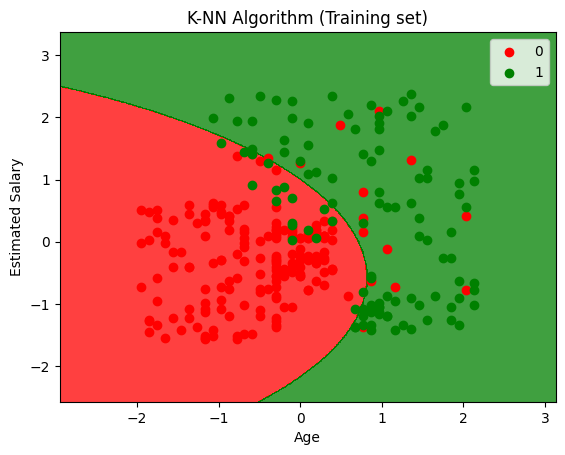

In [78]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

<ipython-input-79-527064f0cf8a>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


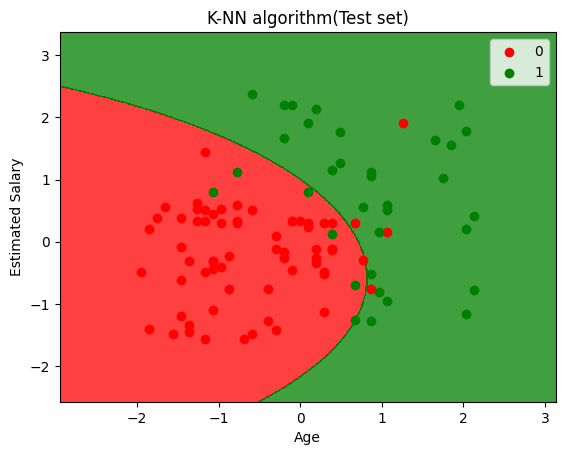

In [79]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

In [80]:
from sklearn.metrics import accuracy_score
print ('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.9
